# Assignment 6 - Personality vs Shoes

The model will use a CNN to predict the personality associated to your favorite shoe.

We will first train a CNN to recognize shoes based on a given image, then use the result to make a prediction on the personality.

The model is trained to recognized multiple types of shoes:
1. Boat Shoes
2. Boots
3. Clogs and Mules
4. Flats
5. Heels
6. Loafers
7. Oxfords
8. Slippers
9. Sneakers and Athletics Shoes

The model then uses the results of the image recognition to predict the personality that someone might have based on the table below:

| Shoe Type                 | Personality Type                                                                                 |
|---------------------------|--------------------------------------------------------------------------------------------------|
| Sneakers and Athletic Shoes | You are an energetic person who values fitness and achievement.                                |
| Oxfords                   | You value professionalism and take pride in your appearance.                                    |
| Clogs and Mules           | You prioritize comfort and have a relaxed, adaptable personality.                               |
| Heels                     | You appreciate quality and have refined tastes.                                                 |
| Flats                | You value simplicity and efficiency in your life.                                               |
| Boots                     | You are practical and value reliability in your endeavors.                                      |
| Slippers                  | You have a free-spirited nature and value comfort.                                              |
| Loafers                   | You appreciate timeless values and consistency.                                                 |
| Boat Shoes                   | You are socially aware and enjoy expressing yourself.                                           |


The Model is trained with 12000 images out of the original 50000. The images that have been removed are the kids shoes then balanced the 9 types of shoes of interest to have at around 1100 images each.

The goal of the model is to input the image of your favorite shoe, and it will predict the personality type you belong to the most.





In [1]:
# Importing Libraries
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
import matplotlib.pyplot as plt

In [ ]:
# prompt: How to unzip a compressed file called Dataset.zip

!unzip Dataset.zip


# Data Preprocessing

In [3]:
data_dir = "Dataset"

# Create an ImageDataGenerator with a validation split
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,  # Center pixel values
    featurewise_std_normalization=True,  # Normalize pixel values
    validation_split=0.2,  # 20% of the data will be used for validation
    rotation_range=30,  # Rotate up to 30 degrees
    width_shift_range=0.2,  # Shift width by 20%
    height_shift_range=0.2,  # Shift height by 20%
    shear_range=0.2,  # Shear transformation
    brightness_range=(0.7, 1.3),  # Adjust brightness
    channel_shift_range=30.0,  # Adjust channel shifts
    fill_mode='nearest',  # Filling mode
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Horizontal flipping
    vertical_flip=True  # Vertical flipping
)

# Fit the generator on the training data if you use normalization or centering
# datagen.fit(train_data)  # Optional

# Load training data
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Specify this as training set
    shuffle=True  # Shuffle the data to improve training
)

# Load validation data
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Specify this as validation set
    shuffle=True  # Shuffle the data to improve validation
)

# Optional: Check the number of images in each set
print(f"Number of training images: {train_data.samples}")
print(f"Number of validation images: {val_data.samples}")


Found 10055 images belonging to 9 classes.
Found 2512 images belonging to 9 classes.
Number of training images: 10055
Number of validation images: 2512


# Building the CNN Model

In [26]:
# Import TensorFlow
import tensorflow as tf

# Define the number of classes
num_classes = 9

# Initialize CNN Model
ShoeModel = tf.keras.models.Sequential()

# Add an Input layer
ShoeModel.add(tf.keras.layers.Input(shape=[150, 150, 3]))

# First Convolution layer
ShoeModel.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'))
ShoeModel.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

# Second Convolution layer
ShoeModel.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
ShoeModel.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

# Third Convolution layer
ShoeModel.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
ShoeModel.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

# Flattening
ShoeModel.add(tf.keras.layers.Flatten())

# Fully connected Dense layer
ShoeModel.add(tf.keras.layers.Dense(units=128, activation='relu'))
ShoeModel.add(tf.keras.layers.Dropout(0.2))  # Dropout to prevent overfitting

# Output layer
ShoeModel.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))

# Compile the model with a reduced learning rate
ShoeModel.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Decreased learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model Checkpoint to save the best model during training
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# Summary of the model
ShoeModel.summary()

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │       2,367,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,392,361 (9.13 MB)

 Trainable params: 2,392,361 (9.13 MB)

 Non-trainable params: 0 (0.00 B)

## Train Model

Epoch 1/200
315/315 ━━━━━━━━━━━━━━━━━━━━ 281s 879ms/step - accuracy: 0.2632 - loss: 2.0501 - val_accuracy: 0.3555 - val_loss: 1.7762
Epoch 2/200
315/315 ━━━━━━━━━━━━━━━━━━━━ 280s 883ms/step - accuracy: 0.3837 - loss: 1.7337 - val_accuracy: 0.3770 - val_loss: 1.6620
Epoch 3/200
315/315 ━━━━━━━━━━━━━━━━━━━━ 275s 869ms/step - accuracy: 0.4084 - loss: 1.6551 - val_accuracy: 0.4061 - val_loss: 1.6102
Epoch 4/200
315/315 ━━━━━━━━━━━━━━━━━━━━ 278s 875ms/step - accuracy: 0.4382 - loss: 1.5976 - val_accuracy: 0.4550 - val_loss: 1.5375
Epoch 5/200
315/315 ━━━━━━━━━━━━━━━━━━━━ 316s 858ms/step - accuracy: 0.4418 - loss: 1.5452 - val_accuracy: 0.4578 - val_loss: 1.5056
Epoch 6/200
315/315 ━━━━━━━━━━━━━━━━━━━━ 271s 856ms/step - accuracy: 0.4773 - loss: 1.4811 - val_accuracy: 0.4697 - val_loss: 1.4874
Epoch 7/200
315/315 ━━━━━━━━━━━━━━━━━━━━ 277s 871ms/step - accuracy: 0.4839 - loss: 1.4526 - val_accuracy: 0.4904 - val_loss: 1.4236
Epoch 8/200
315/315 ━━━━━━━━━━━━━━━━━━━━ 283s 894ms/step - accuracy: 

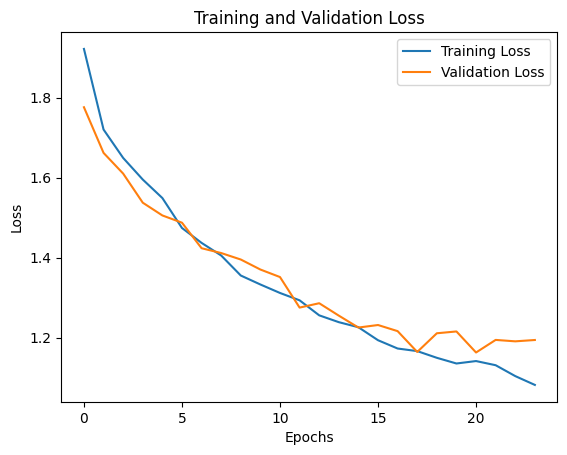

In [27]:
# Fit the model (example usage)
history = ShoeModel.fit(x=train_data, validation_data=val_data, epochs=200, callbacks=[early_stopping, checkpoint])

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Overall Trend:** Both the training and validation loss are decreasing over epochs, which is a good sign that the model is learning.

**Validation Loss Behavior:** Around epoch 15, the validation loss starts to stabilize or even slightly increase while the training loss continues to decrease. This could indicate some overfitting.

# Test Model

In [7]:
accuracy = ShoeModel.evaluate(val_data)
print(f"Accuracy: {accuracy[1]*100:.2f}%")

79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 383ms/step - accuracy: 0.5791 - loss: 1.2197
Accuracy: 58.24%


I tried to train the model on Google Colab on a GPU but it still took a couple hours. This is the best accuracy I got with 12000 images and less than 2 hours of training.

a) Data-Related Issues:

While 10,000 images is a decent size, if they're split across 9 shoe categories, that's only ~1,100 images per class
Possible class imbalance in your dataset
Image quality and variety might be limited
Complex variations within each shoe category might not be well represented

b) Model Architecture Limitations:

The current architecture might be too simple for the complexity of shoe classification
Three convolutional layers might not be enough to capture all necessary features
The model has relatively few filters (16, 32, 64) which might limit feature detection

c) Training Parameters:

Learning rate of 0.001 is reasonable but might need fine-tuning
Early stopping at patience=3 might be too aggressive for this problem
The model stopped at epoch 25 out of 200, suggesting it hit a local minimum

# Predicting the Personality type



In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class ShoePersonalityMapper:
    def __init__(self):
        # Define shoe types to personality traits mapping
        self.shoe_personality_map = {
            'Sneakers and Athletic Shoes': {
                'traits': {
                    'Energetic': 0.9,
                    'Goal-oriented': 0.8,
                    'Health-conscious': 0.7,
                    'Active': 0.9,
                    'Practical': 0.6
                },
                'description': 'You are an energetic person who values fitness and achievement.'
            },
            'Oxfords': {
                'traits': {
                    'Professional': 0.9,
                    'Traditional': 0.7,
                    'Detail-oriented': 0.8,
                    'Status-conscious': 0.6,
                    'Organized': 0.7
                },
                'description': 'You value professionalism and take pride in your appearance.'
            },
            'Clogs and Mules': {
                'traits': {
                    'Laid-back': 0.9,
                    'Comfortable': 0.8,
                    'Adaptable': 0.7,
                    'Practical': 0.8,
                    'Approachable': 0.7
                },
                'description': 'You prioritize comfort and have a relaxed, adaptable personality.'
            },
            'Heels': {
                'traits': {
                    'Status-conscious': 0.9,
                    'Fashion-forward': 0.8,
                    'Quality-oriented': 0.8,
                    'Sophisticated': 0.7,
                    'Image-conscious': 0.9
                },
                'description': 'You appreciate quality and have refined tastes.'
            },
            'Flats': {
                'traits': {
                    'Efficient': 0.8,
                    'Modern': 0.7,
                    'Sophisticated': 0.6,
                    'Practical': 0.9,
                    'Clear-minded': 0.7
                },
                'description': 'You value simplicity and efficiency in your life.'
            },
            'Boots': {
                'traits': {
                    'Rugged': 0.8,
                    'Practical': 0.9,
                    'Independent': 0.7,
                    'Outdoorsy': 0.8,
                    'Reliable': 0.7
                },
                'description': 'You are practical and value reliability in your endeavors.'
            },
            'Slippers': {
                'traits': {
                    'Relaxed': 0.9,
                    'Easy-going': 0.8,
                    'Nature-loving': 0.7,
                    'Free-spirited': 0.8,
                    'Comfortable': 0.9
                },
                'description': 'You have a free-spirited nature and value comfort.'
            },
            'Loafers': {
                'traits': {
                    'Traditional': 0.9,
                    'Reliable': 0.8,
                    'Consistent': 0.8,
                    'Tasteful': 0.7,
                    'Practical': 0.6
                },
                'description': 'You appreciate timeless values and consistency.'
            },
            'Boat Shoes': {
                'traits': {
                    'Fashion-conscious': 0.6,
                    'Social': 0.8,
                    'Creative': 0.7,
                    'Expressive': 0.8,
                    'Dynamic': 0.9
                },
                'description': 'You are socially aware and enjoy expressing yourself.'
            }
        }

    def get_personality(self, shoe_type):
        """
        Get personality traits for a specific shoe type
        """
        if shoe_type in self.shoe_personality_map:
            return self.shoe_personality_map[shoe_type]
        return None

    def analyze_shoe_prediction(self, model_prediction, class_names):
        """
        Analyze model prediction and return personality analysis

        Parameters:
        model_prediction: numpy array of probabilities for each shoe type
        class_names: list of shoe type names corresponding to model output
        """
        # Get the top 3 predictions
        top_3_idx = np.argsort(model_prediction)[-3:][::-1]

        analysis = {
            'primary_shoe': class_names[top_3_idx[0]],
            'confidence': float(model_prediction[top_3_idx[0]]),
            'personality_profile': {},
            'description': '',
            'secondary_influences': []
        }

        # Get primary personality profile
        primary_profile = self.get_personality(analysis['primary_shoe'])
        if primary_profile:
            analysis['personality_profile'] = primary_profile['traits']
            analysis['description'] = primary_profile['description']

        # Add influence from secondary predictions
        for idx in top_3_idx[1:]:
            shoe_type = class_names[idx]
            confidence = float(model_prediction[idx])
            if confidence > 0.1:  # Only consider secondary predictions with >10% confidence
                analysis['secondary_influences'].append({
                    'shoe_type': shoe_type,
                    'confidence': confidence,
                    'traits': self.get_personality(shoe_type)['traits']
                })

        return analysis

    def visualize_personality_traits(self, analysis):
        """
        Create a visualization of the personality traits
        """
        plt.figure(figsize=(10, 6))

        traits = list(analysis['personality_profile'].keys())
        values = list(analysis['personality_profile'].values())

        # Create bar plot
        sns.barplot(x=values, y=traits)
        plt.title(f'Personality Trait Profile - {analysis["primary_shoe"]} ({analysis["confidence"]:.2%} confidence)')
        plt.xlabel('Trait Strength')

        plt.tight_layout()
        plt.show()

# Example usage:
def analyze_shoe_image(image_path, model, mapper):
    """
    Analyze a shoe image and return personality traits
    """
    # Prepare the image
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(150, 150)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, 0)
    img_array = img_array / 255.0

    # Get model prediction
    prediction = model.predict(img_array)[0]

    # Define your class names in the same order as model output
    class_names = ['Boat Shoes', 'Boots', 'Clogs and Mules', 'Flats', 'Heels', 'Loafers', 'Oxfords', 'Slippers', 'Sneakers']

    # Get personality analysis
    analysis = mapper.analyze_shoe_prediction(prediction, class_names)

    return analysis


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Primary Shoe Type: Boots (99.96% confidence)

Personality Profile:
You are practical and value reliability in your endeavors.

Key Traits:
- Rugged: 80.00%
- Practical: 90.00%
- Independent: 70.00%
- Outdoorsy: 80.00%
- Reliable: 70.00%


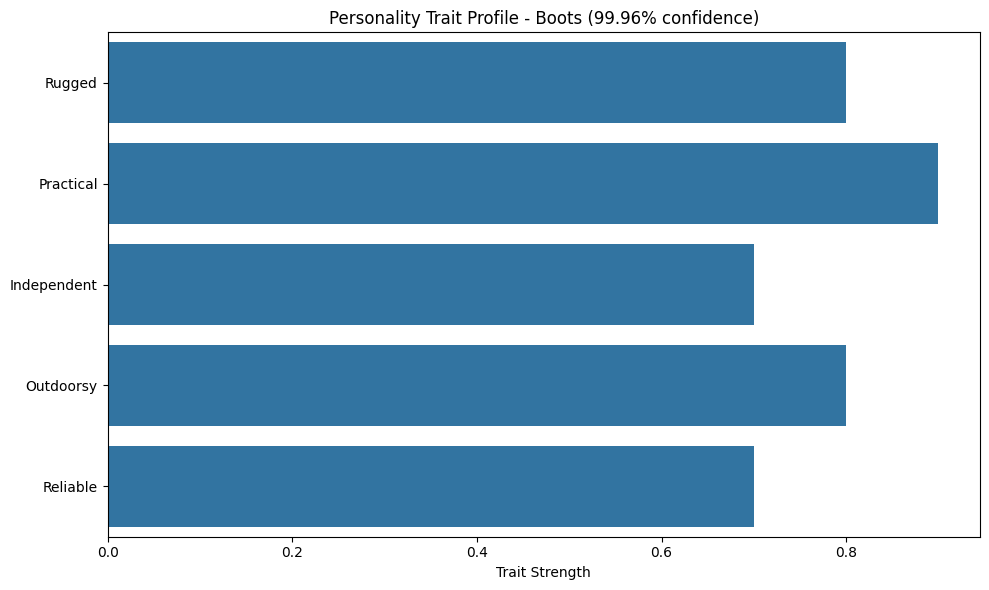

In [30]:
# Make a prediction
# Create mapper instance
mapper = ShoePersonalityMapper()

# Load image and get analysis
image_path = '101026.3.jpg'
analysis = analyze_shoe_image(image_path, ShoeModel, mapper)

# Print results
print(f"Primary Shoe Type: {analysis['primary_shoe']} ({analysis['confidence']:.2%} confidence)")
print("\nPersonality Profile:")
print(analysis['description'])
print("\nKey Traits:")
for trait, strength in analysis['personality_profile'].items():
    print(f"- {trait}: {strength:.2%}")

# Visualize traits
mapper.visualize_personality_traits(analysis)

# Conclusion

The model uses a CNN to predict the type of shoe based on an image, then map the type of shoe to a personality type according to personality traits. The mapping uses a confusion matrix to determine how confident the model is in predicting personality type and which trait is more likely to be observed as well.